![title](./media/walmart_christmas.jpg)

# Walmart: Weihnachtsgeschäft Just in Time

Modulprojekt für die Vorlesung __Data-Mining-Process__

_Dozent:_ Prof. Dr. Johannes Maucher  
_Studenten:_ Stephanie Flohr, Benedikt Haußner, Robert Masendorf

**Hinweis:** Zu korrekten Darstellung der Ergebnisse in den MarkDowns muss die Nbextension ```Python Markdown``` aktiviert sein. Zusätzlich muss ein ```Trusted```Kernel verwendet werden.

Für unser Projekt analysiseren wir Verkaufsdaten der amerikanischen Supermarktkette _Walmart_.

**ToDo:** Vorgehensmodell CRISP-DM kurz erläutern (Grafik)

## BUSINESS UNDERSTANDING: Ursprung und grober Inhalt des Datensatzes

### Was ist Walmart?
Walmart ist der wertvollste Einzelhändler der Welt mit einer Marktkapitalisierung von 246,2 Mrd. US-Dollar. Weitere Fakten:
+ Anzahl Filialen weltweit: ca 11.600
+ Jahresumsatz 2017: 50,3 Mrd. US-Dollar
+ Gewinn 2017: 9,9 Mrd. US-Dollar
+ Anzahl der Mitarbeiter weltweit: ca 2 Millionen

Quelle: [Wikipedia](https://de.wikipedia.org/wiki/Walmart)

### _Just in Time_ bei Walmart
[Wikipedia](https://de.wikipedia.org/wiki/Walmart)

Walmarts Strategie beruht auf ein Konzept aus geringen Preisen und gewinnmargen begleitet durch geringe Lohn- und Gehaltzahlungen trotz hohem Profit. Ein wichtiger Baustein in diesem Konzept ist auch die Produktion nach Just in Time. Walmart unterhält keine Warenlager, sondern entwickelte eine ausgefeilte Logistik, durch die die Produkte direkt aus der Produktion zu den Logistzentren geliefert werden. Dadurch sind keine Zwischenlager mehr notwendig. Um dieses Konzept weltweit umsetzen zu können, beschäftigt Walmart 2000 Analysten. 

### Wettbewerb auf Kaggle
[Walmart - Nähere Informationen zur Competition](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting).

Walmart stellt den genutzen Datensatz auf Kaggle für einen Bewerberwettbewerb zur Verfügung. Mit dem Wettbewerb möchte Waltmart die besten Kandidaten für zukünftige Mitarbeiter herausfiltern. Den Bewerbern gibt diese Competition die Möglichkeit, ihr Können vorzuzeigen. 

Der Datensatz beinhaltet historische Verkaufdaten von 45 Walmart Märkten an unterschiedlichen Standorten. Diese sind widerum in sich in unterschiedliche Abteilungen unterteilt. Es gilt je Bereich eine Analyse der Salesdaten zu entwickeln und damit vorhersagen, welcher Bereich am effektivsten arbeitet.

Dieses Assignment hat nicht das Ziel, an dem Wettbewerb mitteilzunehmen. Wir möchten uns als Ziel setzen, aus dem Daten zum Vorweihnachtsgescheftsmonaten aus 2010 das für 2011 vorhersagen zu können.


### Ziel unserer Arbeit
__TODO:__ Ausführlicher Beschreiben Es ist unser Ziel, aus Daten der Jahre 2010 und 2011 eine Prognose für die Verkaufszahlen des Jahres 2011 zu ermitteln.
+ schaut mal ein Kapitel drüber, ich glaube, dass habe ich schon fertig

## DATA UNDERSTANDING: Was wissen wir und was wollen wir wissen?

In der zweiten Phase des CRISP-VGMs betrachten wir die uns zur Verfügung stehenden Daten.  
Dabei beantworten wir folgende Fragen:
+ Was sind die Quellen unserer Daten?
+ Wie sind die uns zur Verfügung stehenden Dateien aufgebaut?
+ Welche Wertbereiche umfassen die Daten und welche Verteilungen sind zu erkennen?
    + Gibt es dabei Dinge, die wir so nicht erwartet hätten?
+ Genügt die Qualität der Daten, um in die Phase der Data Preparation übertreten zu können?

### Initiale Datensammlung

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras import layers
from keras.models import Sequential
#from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.
/Users/DE2303318/miniconda3/envs/condatascience/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Das von Walmart zur Verfügung gestellte Datenpaket beinhaltet drei für uns relevante csv-Dateien:
+ ```train.csv```
+ ```features.csv```
+ ```stores.csv```

Die beiden Dateien ```test.csv``` und ```sampleSubmission.csv``` sind nur für den Wettbewerb interessant und werden daher hier nicht behandelt.  
Weitere Informationen zu den einzelen Datasets: [Walmart - Data](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data)

### Beschreibung der Daten

Im Folgenden werden die Attribute der einzelnen csv-Dateien kurz dargestellt.

#### train.csv

In [2]:
data_df = pd.read_csv('./data/train.csv')
display(data_df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Die Attribute ```Store```, ```Dept```und ```Date``` sind zusammen der Primärschlüssel der Tabelle.

+ ```Store```: eindeutige Filial-ID
+ ```Dept```: pro Filiale eindeutige Abteilungs-ID
+ ```Date```: Enddatum der Woche, für die die Verkäufe summiert wurden
+ ```Weekly_Sales```: Wochenumsatz pro Abteilung und Filiale
+ ```IsHoliday```: Feiertagsanzeiger
    + ```True```, falls in der vergangenen Woche ein Feiertag lag

#### features.csv

In [3]:
features_df = pd.read_csv('./data/features.csv')
display(features_df.head())

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Die Attribute ```Store``` und ```Date``` sind zusammen der Primärschlüssel der Tabelle.

+ ```Store```: eindeutige Filial-ID
+ ```Date```: Enddatum der Woche
+ ```Temperature```: gemittelte Temperatur der Woche
+ ```Fuel_Price```: gemittelter Benzinpreis der Woche
+ ```MarkDown 1-5```: Metriken, die Auskunft über spezielle Werbeangebote der Woche geben
+ ```CPI```: Verbraucherpreisindex der Woche
+ ```Unemployment```: Arbeitslosenquote der Woche
+ ```IsHoliday```: Feiertagsanzeiger
    + ```True```, falls in der vergangenen Woche ein Feiertag lag
    + Duplikat des Attributs selbigen Namens in der Datei ```train.csv```

#### stores.csv

In [4]:
stores_df = pd.read_csv('./data/stores.csv')
display(stores_df.head())

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


+ ```Store```: eindeutige Filial-ID
+ ```Type```: Typ der Filiale (wobei die drei Klassen ```A```, ```B```und ```C``` vorhanden sind)
+ ```Size```: Größe der Filiale
    + Nachdem die Daten anonymisiert sind, sind die Angaben nicht in m<sup>2</sup> oder ft<sup>2</sup> , sondern abstrahiert zu verstehen.

### Datenexploration

Im Folgenden sollen die einzelnen Datensätze getrennt voneinander untersucht werden.  
Von besonderem Interesse sind Wertebereiche, Extremwerte und fehlende Werte.

#### Train - Datensatz

Der Datensatz ```train.csv``` enthält die Attribute ```Store```, ```Dept```, ```Date```, ```Weekly_Sales``` und ```IsHoliday```.

Im Folgenden untersuchen wir die einzelnen Attribute, wobei wir uns auf einzelne, interessante Fragestellungen beschränken, anstatt komplette univariate Analysen auszugeben.  

Das Attribut ```IsHoliday``` wird hier auch von der Anzahl der Abteilungen beeinflusst.  
Nachdem das Attribut auch im Datensatz ```features.csv``` vorkommt, wird es dort betrachtet.

##### Store

Der Datensatz umfasst __{{data_df.Store.nunique()}} einzelne Stores__.

##### Dept

Es gibt insgesamt __{{data_df.Dept.nunique()}} verschiedene Abteilungen__.  
Die IDs der Abteilungen reichen dabei von __{{data_df.Dept.min()}}__ bis __{{data_df.Dept.max()}}__.

Fraglich ist, ob jeder Store auch tatsächlich jede Abteilung beherbergt:

__TODO__: Wie viele Abteilungen und Departments gibts es? Macht es Sinn, die Darstellung auf eine "Top 10" zu beschränken?

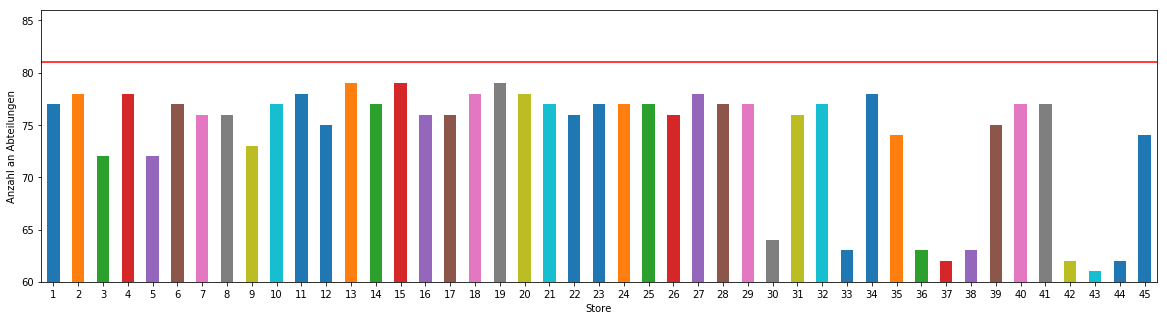

In [5]:
data_df.groupby('Store')['Dept'].nunique().plot(figsize=(20, 5), kind='bar', rot=0).set_ylabel('Anzahl an Abteilungen')
plt.axhline(data_df.Dept.nunique(), color='red')
plt.ylim(60, data_df.Dept.nunique() + 5)
plt.show()

Wir können beobachten, dass es nicht einen einzigen Store gibt, der alle Abteilungen unter einem Dach vereint.  
__Der kleinste Store umfasst dabei {{data_df.groupby('Store')['Dept'].nunique().min()}} Abteilungen, der größte {{data_df.groupby('Store')['Dept'].nunique().max()}} Abteilungen__.

Weiterhin ist von Interesse, ob es Abteilungen gibt, die in jedem Store vorhanden sind oder eben nicht:

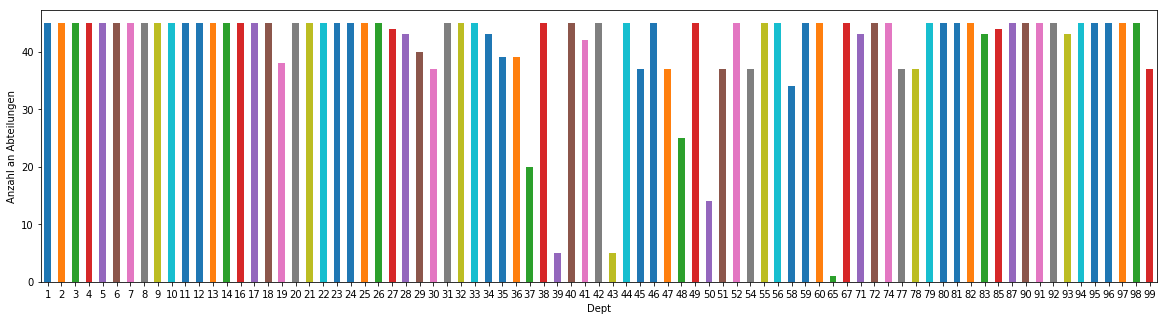

In [6]:
dept_in_stores_series = data_df.groupby('Dept')['Store'].nunique()
dept_in_stores_series.plot(figsize=(20, 5), kind='bar', rot=0).set_ylabel('Anzahl an Abteilungen')
plt.show()

Insgesamt gibt es __{{dept_in_stores_series.value_counts()[45]}} Abteilungen, die in jedem Store vertreten sind__, das sind ca {{int(dept_in_stores_series.value_counts(normalize=True)[45]*100)}} Prozent aller Abteilungen.  
__Abteilung {{dept_in_stores_series[dept_in_stores_series==1].index.values[0]}} gibt es nur in einem einzigen Store__. Sie ist dabei die einzige Abteilung, die in nur einem Store existiert.

##### Date

Der älteste Messwert ist vom ```{{data_df.Date.min()}}```, der jüngste Messwert ist vom ```{{data_df.Date.max()}}```.  
Insgesamt wurde an {{data_df.Date.nunique()}} Tagen gemessen.

##### Weekly Sales

Anzahl Messpunkte:	421570
Kleinster Betrag:	-4988.94
Median:			7612.03
Durchschnitt:		15981.26
Größter Betrag:		693099.36


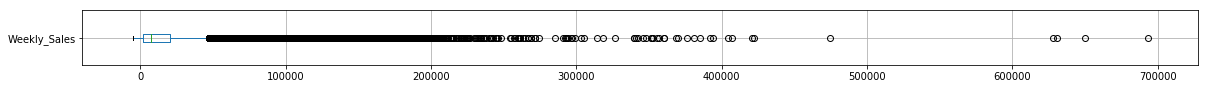

In [7]:
print("Anzahl Messpunkte:\t{}".format(data_df.Weekly_Sales.count()))
print("Kleinster Betrag:\t{}".format(data_df.Weekly_Sales.min()))
print("Median:\t\t\t{}".format(data_df.Weekly_Sales.median()))
print("Durchschnitt:\t\t{0:.2f}".format(data_df.Weekly_Sales.mean()))
print("Größter Betrag:\t\t{}".format(data_df.Weekly_Sales.max()))

pd.DataFrame(data_df.Weekly_Sales).boxplot(figsize=(20,1), vert=False)
plt.show()

__Interessant:__ es sind auch negative Werte für den Umsatz enthalten und das nicht zu knapp:  
Dieses Verhalten kann in  1285 Einzelmessungen beobachtet werden, es tritt in allen Stores und Wochen auf.  
Wie es dazu kommt wird [hier](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/discussion/7152) erklärt, es wurden in der Periode Waren für mehr Wert retourniert als gekauft.

#### Features - Datensatz

Der Datensatz ```features.csv``` enthält die Attribute ```Store```, ```Date```, ```Temperature```, ```Fuel_Price```, ```Markdown 1-5```, ```CPI```, ```Unemployment``` und ```IsHoliday```.

##### Store und Date

Nachdem die Datensätze ```train.csv``` und ```features.csv``` in einem späteren Schritt über die Attribute ```Store``` und ```Date``` gejoined werden sollen, wird hier überprüft, ob ein Inner Join ohne Verluste möglich ist:

In [8]:
data_join_df = data_df[['Store', 'Date']]

features_join_df = features_df[['Store', 'Date']]
features_join_df = features_join_df[features_join_df.Date <= data_join_df.Date.max()]

cnt_rows_without_partner = len(pd.concat([data_join_df, features_join_df]).drop_duplicates(keep=False))
print("Es wurden für {} Zeilen keine Join-Partner gefunden.".format(cnt_rows_without_partner))

Es wurden für 0 Zeilen keine Join-Partner gefunden.


Ein Join ist also ohne Verluste machbar.

##### Temperature

In [9]:
print("Die niedrigste gemessene Temperatur:\t{}".format(features_df.Temperature.min()))
print("Die höchste gemessene Temperatur:\t{}".format(features_df.Temperature.max()))
print("Median der Temperatur:\t\t\t{}".format(features_df.Temperature.median()))

Die niedrigste gemessene Temperatur:	-7.29
Die höchste gemessene Temperatur:	101.95
Median der Temperatur:			60.71


Nachdem Nachrichten über gekochte Amerikaner auch uns in Europa erreicht hätten, gehen wir davon aus, dass die Temperatur in Fahrenheit vorliegt.  
In einem ersten Schritt wollen wir diese umrechnen:

In [10]:
def fahr_to_celsius(temp_fahr):
    return round((temp_fahr - 32) * 5 / 9, 2)

features_df['Temperature_F'] = features_df.Temperature
features_df['Temperature_C'] = features_df.Temperature.apply(lambda tmp_fahr: fahr_to_celsius(tmp_fahr))
features_df.drop(columns=['Temperature'], inplace=True)

In [11]:
print("Die niedrigste gemessene Temperatur:\t{}".format(features_df.Temperature_C.min()))
print("Die höchste gemessene Temperatur:\t{}".format(features_df.Temperature_C.max()))
print("Median der Temperatur:\t\t\t{}".format(features_df.Temperature_C.median()))

Die niedrigste gemessene Temperatur:	-21.83
Die höchste gemessene Temperatur:	38.86
Median der Temperatur:			15.95


Diese Ergebnisse ergeben durchaus mehr Sinn aus der europäischen Perspektive.

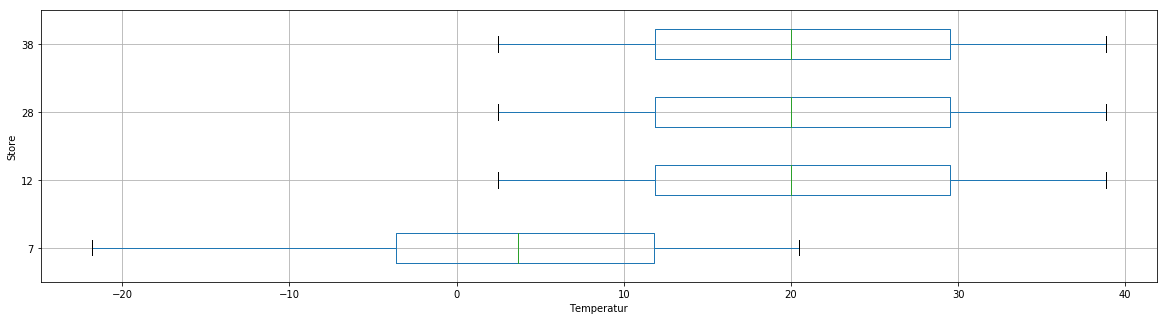

In [12]:
list_of_stores = features_df[features_df.Temperature_C == features_df.Temperature_C.min()].Store.tolist() + features_df[features_df.Temperature_C == features_df.Temperature_C.max()].Store.tolist()
temperature_store_df = pd.DataFrame()

for store in list_of_stores:
    temperature_store_df[store] = features_df.Temperature_C[features_df.Store == store].tolist()
    temperature_store_df.reset_index(drop=True, inplace=True)
    
temperature_store_df.boxplot(figsize=(20,5), vert=False)
plt.xlabel("Temperatur")
plt.ylabel("Store")
plt.show()

##### Fuel_Price

Der niedrigste Preis pro Gallone Sprit:		2.472
Der höchste Preis pro Gallone Sprit:		4.468
Median des Spritpreises pro Gallone:		3.513


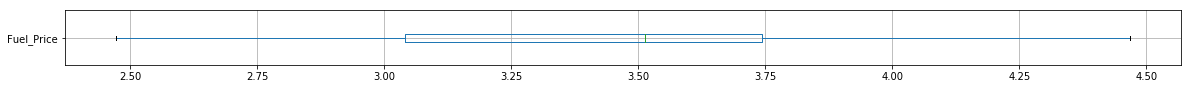

In [13]:
print("Der niedrigste Preis pro Gallone Sprit:\t\t{}".format(features_df.Fuel_Price.min()))
print("Der höchste Preis pro Gallone Sprit:\t\t{}".format(features_df.Fuel_Price.max()))
print("Median des Spritpreises pro Gallone:\t\t{}".format(features_df.Fuel_Price.median()))

pd.DataFrame(features_df.Fuel_Price).boxplot(figsize=(20,1), vert=False)
plt.show()

##### MarkDown 1-5

Der Beschreibung auf [Kaggle](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data) entnehmen wir, dass die Werte für die Marketingaktionen erst ab November 2010 verfügbar sind. Zudem fehlen angeblich Daten für weitere Wochen.  
Nachdem wir die Werte ab September 2010 für die Prognose nutzen wollen, könnte es sein, dass die Attribute für uns wertlos sind.

Auf jeden Fall soll an dieser Stelle untersucht werden, wie es sich mit fehlenden Werten im Datensatz generell verhält:

In [14]:
pd.DataFrame(features_df.isnull().sum())

,0
Store,0
Date,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585
Unemployment,585


Wir wollen wissen, für welchen Zeitraum tatsächlich Daten der Attribute ```MarkDown 1-5``` vorhanden sind:

In [15]:
print("Erstes Datum mit allen Werten für MarkDown:\t{}".format(features_df[['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].dropna().Date.min()))
print("Letztes Datum mit allen Werten für MarkDown:\t{}".format(features_df[['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].dropna().Date.max()))

Erstes Datum mit allen Werten für MarkDown:	2011-11-11
Letztes Datum mit allen Werten für MarkDown:	2013-07-26


Nachdem wir aus den Daten von 2010 für das Weihnachtsgeschäft von 2011 lernen wollen, sind die Attribute ```MarkDown 1-5``` für uns wertlos und werden in der Phase der __Data Preparation__ entfernt.

##### CPI

Der Verbrauchspreisindex zeigt die Steigerung (oder Minderung) der Lebenshaltungskosten an.  
Dabei existieren verschiedene CPIs - mit welchem genau wir es zu tun haben und welches das Basisjahr ist, konnten wir nicht ermitteln.  
In den USA basiert der Index häufig auf den Jahren 1982 bis 1984, was für die vorliegenden Werte allerdings nicht stichhaltig aussieht.

Der niedrigste Wert des CPI:	126.064
Der höchste Wert des CPI:	228.9764563
Median des CPI:			182.7640032


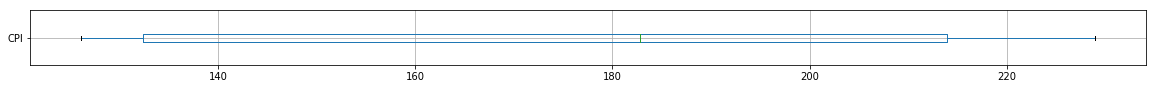

In [16]:
print("Der niedrigste Wert des CPI:\t{}".format(features_df.CPI.min()))
print("Der höchste Wert des CPI:\t{}".format(features_df.CPI.max()))
print("Median des CPI:\t\t\t{}".format(features_df.CPI.median()))

pd.DataFrame(features_df.CPI).boxplot(figsize=(20,1), vert=False)
plt.show()

Wie soeben in der Auswertung der ```MarkDown```-Attribute gesehen, fehlen auch hier Werte.  
Diese fehlenden Werte müssen, falls nötig, in der Phase der __Data Preparation__ nachberechnet werden.

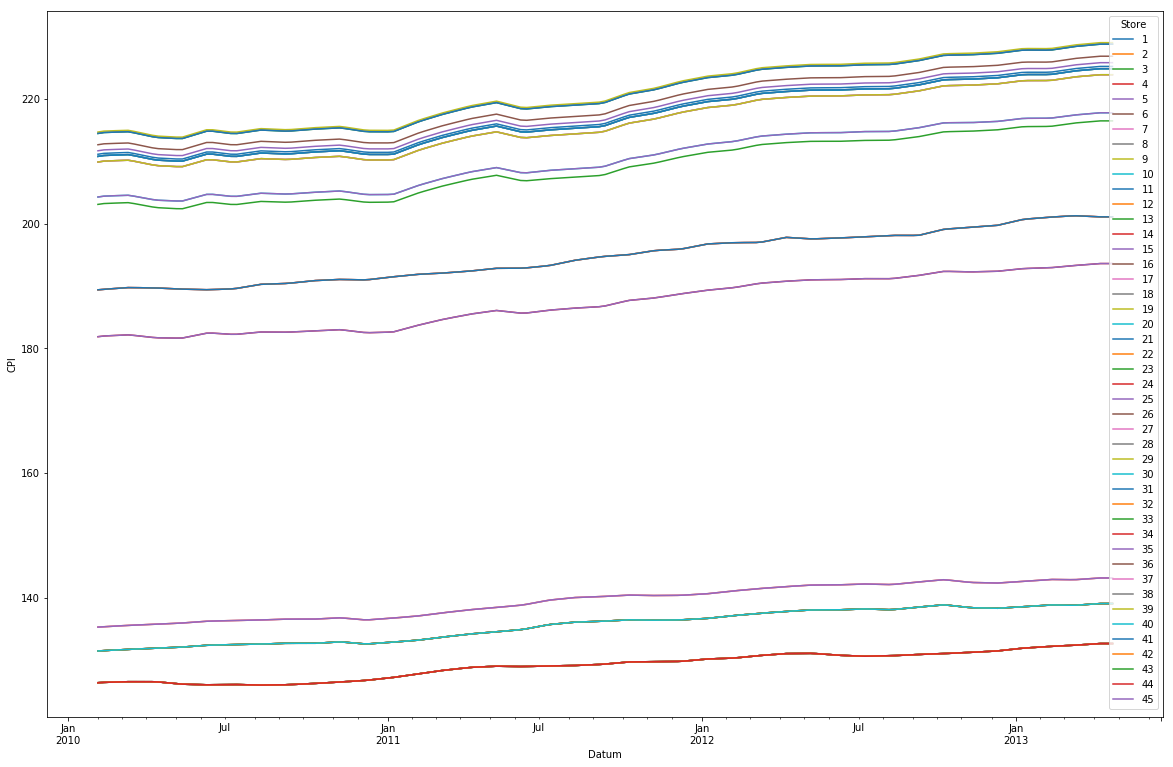

In [17]:
cpi_df = features_df.set_index(keys=['Store', 'Date'])['CPI'].unstack(level='Store')
cpi_df.index = pd.to_datetime(cpi_df.index)
cpi_df.plot(figsize=(20,13))
plt.xlabel('Datum')
plt.ylabel('CPI')
plt.show()

__Dieses Finding ist interessant:__  
Warum gibt es Regionen, in denen der CPI den minimalen Wert von ```{{features_df.CPI.min()}}``` hat, im Gegensatz zu Regionen, bei denen der maximale Wert ```{{features_df.CPI.max()}}```, also fast das Doppelte, beträgt?  
Zumindest in Deutschland ließe sich ein derartiger Unterschied im Einzelhandel nicht regional beurteilen.  
Wir werden dieses Thema später eventuell nochmals aufgreifen.

##### Unemployment

Der niedrigste Wert des Unemployment:	3.6839999999999997
Der höchste Wert des Unemployment:	14.312999999999999
Median des Unemployment:		7.806


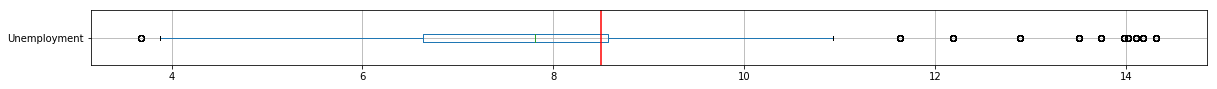

In [18]:
print("Der niedrigste Wert des Unemployment:\t{}".format(features_df.Unemployment.min()))
print("Der höchste Wert des Unemployment:\t{}".format(features_df.Unemployment.max()))
print("Median des Unemployment:\t\t{}".format(features_df.Unemployment.median()))

mean_umempl_usa_201011 = (8.9 + 8.1) / 2

pd.DataFrame(features_df.Unemployment).boxplot(figsize=(20,1), vert=False)
plt.axvline(x=mean_umempl_usa_201011, color='red')
plt.show()

Wir haben die Daten des Datensatzes mit der durchschnittlichen Arbeitslosenquote der Vereinigten Staaten aus den Jahren 2011 und 2012 (Quelle: [Wikipedia](https://de.wikipedia.org/wiki/Arbeitsmarktstatistik_der_Vereinigten_Staaten#2011_bis_2018)) in Höhe von ```{{mean_umempl_usa_201011}}``` verglichen.

Dabei zeigt sich, dass die Daten in Walmarts erhoben wurden, die potentiell eher in Regionen mit niedrigerer Arbeitslosenquote angesiedelt sind.  
Dieses zeigt sich auch in den Ausreißern: während in Q1 und Q2 die Daten eher dicht gepackt sind, streut Q3 und vor allem Q4 stark.

##### IsHoliday

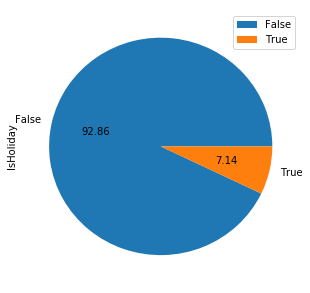

In [19]:
pd.DataFrame(features_df.IsHoliday).apply(pd.value_counts).plot.pie(figsize=(5,5), y='IsHoliday', autopct='%.2f')
plt.show()

Wie in der Grafik zu sehen, sind in ```7.14%``` der betrachteten Datensätze Feiertage zu verzeichnen.  
In diesem Zeitraum liegen unter anderem:
+ Super Bowl
+ Labor Day
+ Thanksgiving
+ Black Friday
+ Weihnachten

#### Stores - Datensatz

Der Datensatz ```stores.csv``` enthält die Attribute ```Store```, ```Type``` und ```Size```.

##### Store
```Store``` stellt für die Datei den Primärschlüssel, dabei sind alle Stores von ID ```{{stores_df.Store.min()}}``` bis ID ```{{stores_df.Store.max()}}``` enthalten.

##### Type

Das Attribut ```Type``` enthält die Werte ```{{stores_df.Type.unique()[0]}}```, ```{{stores_df.Type.unique()[1]}}``` und ```{{stores_df.Type.unique()[2]}}```.  
Es gibt folgende unterschiedliche Typen von Märkten (Quelle: [Walmart Store Locator](https://corporate.walmart.com/our-story/our-business)), wobei wir uns nicht sicher sind, inwieweit dies gemapped werden kann:
+ Walmart Supercenter
+ Walmart Discount Store
+ Walmart Neighbourhood Market

Die Verteilung der Store-Typen gestaltet sich wie folgt:

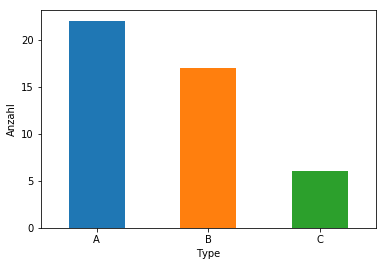

In [20]:
stores_df.groupby('Type')['Type'].count().plot(kind='bar', rot=0)
plt.ylabel("Anzahl")
plt.show()

##### Size
Nachdem die Daten anonymisiert sind, kann keine definitive Aussage darüber getroffen werden, in welcher Einheit die gegebenen Werte im Bereich von ```{{stores_df.Size.min()}}``` bis ```{{stores_df.Size.max()}}``` vorliegen.  
Allerdings entsprechen die Durchschnittswerte für die einzelnen Typen ziemlich exakt den Typen von Walmarts, die im letzten Punkt angesprochen worden waren:

<img src="./media/walmart_types.jpg" width="800"/>

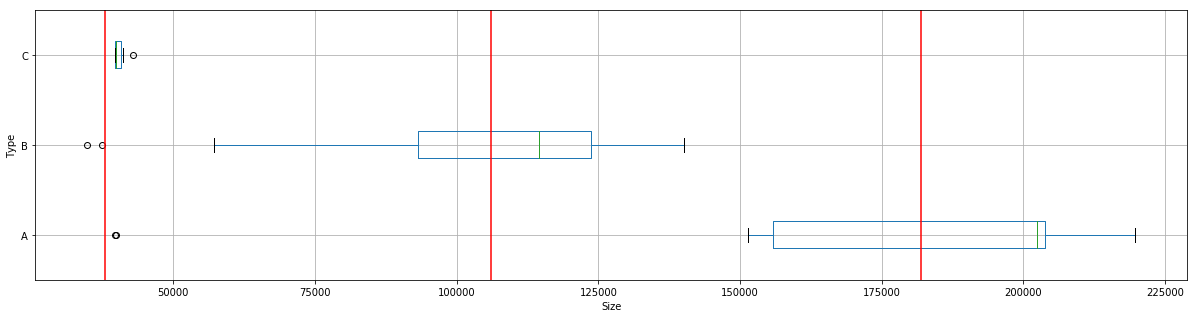

In [21]:
size_a_type = 182000
size_b_type = 106000
size_c_type = 38000

stores_df.boxplot(column='Size', by='Type', vert=False, figsize=(20,5))
plt.axvline(x=size_a_type, color='red')
plt.axvline(x=size_b_type, color='red')
plt.axvline(x=size_c_type, color='red')

plt.suptitle('')
plt.title('')
plt.xlabel('Size')
plt.ylabel('Type')
plt.show()

#### Erste Hypothesen
Um erste Hypothesen aufstellen zu können, die über unsere bisherigen Betrachtungen (beispielsweise zur Arbeitslosenquote) hinausgehen, müssen wir die Datensätze miteinander verbinden. Hierfür verweisen wir auf die Phase der __Data Preparation__.

### Betrachtung der Datenqualität
Die mangelnde Qualität der Features ```MarkDown 1-5``` wurde bereits angesprochen.  
Darüber hinausgehende Aussagen können erst in der Phase der __Data Preparation__ getroffen werden.

Auf den ersten Blick sieht es so aus, als würden die zur Verfügung stehenden Daten ausreichen, um erste Modelle zu bauen. Sie enthalten vorerst alle wichtigen Informationen. Falls die Qualität der Modelle nicht zufriedenstellend ist, ist die Struktur geeignet, um durch weitere Daten erweitert zu werden. 

## DATA PREPARATION: was wollen wir verwenden und wie?

### zeitlicher Zuschnitt der Daten auf das Projektziel

In [22]:
data_df.Date = pd.to_datetime(data_df.Date)

In [23]:
xmas_data_df = data_df[((data_df.Date >= '2010-02-05') & (data_df.Date <= '2011-12-31'))]
xmas_data_df.reset_index(inplace=True, drop=True)

In [24]:
display(xmas_data_df.loc[(xmas_data_df['Store'] == 1) & (xmas_data_df['Dept'] ==1)].head(2))
display(xmas_data_df.loc[(xmas_data_df['Store'] == 1) & (xmas_data_df['Dept'] ==1)].tail(2))
print("\nWir betrachten insgesamt Daten von {} Wochen.".format(xmas_data_df.Date.nunique()))

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


,Store,Dept,Date,Weekly_Sales,IsHoliday
98,1,1,2011-12-23,46788.75,False
99,1,1,2011-12-30,23350.88,True



Wir betrachten insgesamt Daten von 100 Wochen.


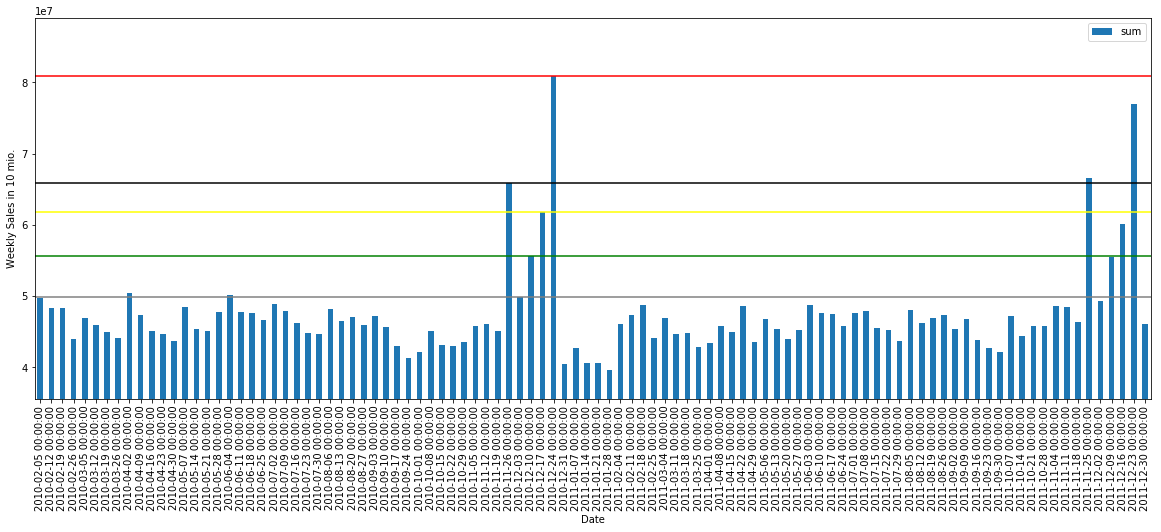

In [25]:
xmas_data_df.groupby('Date').agg(['sum']).reset_index().plot(x='Date', y='Weekly_Sales',kind="bar", figsize=(20,7)).set_ylabel("Weekly Sales in 10 mio.")
plt.axhline(y=xmas_data_df['Weekly_Sales'][xmas_data_df.Date == '2010-11-26'].agg(['sum'])[0], color='black')
plt.axhline(y=xmas_data_df['Weekly_Sales'][xmas_data_df.Date == '2010-12-03'].agg(['sum'])[0], color='grey')
plt.axhline(y=xmas_data_df['Weekly_Sales'][xmas_data_df.Date == '2010-12-10'].agg(['sum'])[0], color='green')
plt.axhline(y=xmas_data_df['Weekly_Sales'][xmas_data_df.Date == '2010-12-17'].agg(['sum'])[0], color='yellow')
plt.axhline(y=xmas_data_df['Weekly_Sales'][xmas_data_df.Date == '2010-12-24'].agg(['sum'])[0], color='red')
# Anpassung y-Achse über min- und max-Werte mit Faktor 0.1
plt.ylim(xmas_data_df.groupby('Date').agg(['sum']).Weekly_Sales.min()[0] * 0.9, xmas_data_df.groupby('Date').agg(['sum']).Weekly_Sales.max()[0] * 1.1)
plt.show()

In dieser Grafik lässt sich ein Muster des Verlaufs der Verkaufszahlen in der Weihnachstzeit erkennen, weshalb wir erhoffen, gute Prognosen aus den Daten ableiten zu können.

### Feature Engineering

__Neues Feature next_week__  
Weil die Feiertage so wichtig bla

In [26]:
xmas_data_df.loc[xmas_data_df.Date == '2010-11-19', 'next_week'] = 'black_friday'
xmas_data_df.loc[xmas_data_df.Date == '2010-11-26', 'next_week'] = 'xmas_1st_week'
xmas_data_df.loc[xmas_data_df.Date == '2010-12-03', 'next_week'] = 'xmas_2nd_week'
xmas_data_df.loc[xmas_data_df.Date == '2010-12-10', 'next_week'] = 'xmas_3rd_week'
xmas_data_df.loc[xmas_data_df.Date == '2010-12-17', 'next_week'] = 'xmas_4th_week'
xmas_data_df.loc[xmas_data_df.Date == '2010-12-24', 'next_week'] = 'new_year'

xmas_data_df.loc[xmas_data_df.Date == '2011-11-18', 'next_week'] = 'black_friday'
xmas_data_df.loc[xmas_data_df.Date == '2011-11-25', 'next_week'] = 'xmas_1st_week'
xmas_data_df.loc[xmas_data_df.Date == '2011-12-02', 'next_week'] = 'xmas_2nd_week'
xmas_data_df.loc[xmas_data_df.Date == '2011-12-09', 'next_week'] = 'xmas_3rd_week'
xmas_data_df.loc[xmas_data_df.Date == '2011-12-16', 'next_week'] = 'xmas_4th_week'
xmas_data_df.loc[xmas_data_df.Date == '2011-12-23', 'next_week'] = 'new_year'

/Users/DE2303318/miniconda3/envs/condatascience/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/DE2303318/miniconda3/envs/condatascience/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Jetzt one hhot

In [27]:
xmas_data_df = pd.get_dummies(data=xmas_data_df, columns=['next_week'], prefix='nw')

In [28]:
xmas_data_df.iloc[19:27]

,Store,Dept,Date,Weekly_Sales,IsHoliday,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,nw_xmas_4th_week
19,1,1,2010-06-18,16216.27,False,0,0,0,0,0,0
20,1,1,2010-06-25,16328.72,False,0,0,0,0,0,0
21,1,1,2010-07-02,16333.14,False,0,0,0,0,0,0
22,1,1,2010-07-09,17688.76,False,0,0,0,0,0,0
23,1,1,2010-07-16,17150.84,False,0,0,0,0,0,0
24,1,1,2010-07-23,15360.45,False,0,0,0,0,0,0
25,1,1,2010-07-30,15381.82,False,0,0,0,0,0,0
26,1,1,2010-08-06,17508.41,False,0,0,0,0,0,0


__Neues Feature days_to_christmas__  
Um zeitlichen Verlauf abzubilden

In [29]:
xmas_data_df['days_2_xmas'] = xmas_data_df.Date.apply(lambda x: (date(x.year,12,25) - x.date()).days)
xmas_data_df[['Date', 'days_2_xmas']].head()

,Date,days_2_xmas
0,2010-02-05,323
1,2010-02-12,316
2,2010-02-19,309
3,2010-02-26,302
4,2010-03-05,295


Auch OHE für store type

In [30]:
if 'Type' in stores_df.columns:
    stores_df = pd.get_dummies(data=stores_df, columns=['Type'], prefix='type')
stores_df.head()

,Store,Size,type_A,type_B,type_C
0,1,151315,1,0,0
1,2,202307,1,0,0
2,3,37392,0,1,0
3,4,205863,1,0,0
4,5,34875,0,1,0


für IsHoliday nicht nötig, weil sch boolean in int casten lässt:

In [31]:
features_df.IsHoliday = features_df.IsHoliday.astype(int)
features_df.head()

,Store,Date,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Temperature_F,Temperature_C
0,1,2010-02-05,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,42.31,5.73
1,1,2010-02-12,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,38.51,3.62
2,1,2010-02-19,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,39.93,4.41
3,1,2010-02-26,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,46.63,8.13
4,1,2010-03-05,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,46.50,8.06


### Merge Datasets

Hier werden die Datensets ```features_df``` und ```stores_df``` mit ```xmas_data_df``` gemerged.

In [32]:
xmas_data_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,nw_xmas_4th_week,days_2_xmas
0,1,1,2010-02-05,24924.50,False,0,0,0,0,0,0,323
1,1,1,2010-02-12,46039.49,True,0,0,0,0,0,0,316
2,1,1,2010-02-19,41595.55,False,0,0,0,0,0,0,309
3,1,1,2010-02-26,19403.54,False,0,0,0,0,0,0,302
4,1,1,2010-03-05,21827.90,False,0,0,0,0,0,0,295


In [33]:
features_df.Date = pd.to_datetime(features_df.Date)
if 'IsHoliday' in xmas_data_df.columns:
    xmas_data_df.drop(columns=['IsHoliday'],inplace=True)

In [34]:
merged_df = pd.merge(xmas_data_df,features_df,on=['Store','Date'])
merged_all_df = pd.merge(merged_df,stores_df,on='Store')
merged_all_df.head()

,Store,Dept,Date,Weekly_Sales,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,nw_xmas_4th_week,...,MarkDown5,CPI,Unemployment,IsHoliday,Temperature_F,Temperature_C,Size,type_A,type_B,type_C
0,1,1,2010-02-05,24924.50,0,0,0,0,0,0,...,NaN,211.096358,8.106,0,42.31,5.73,151315,1,0,0
1,1,2,2010-02-05,50605.27,0,0,0,0,0,0,...,NaN,211.096358,8.106,0,42.31,5.73,151315,1,0,0
2,1,3,2010-02-05,13740.12,0,0,0,0,0,0,...,NaN,211.096358,8.106,0,42.31,5.73,151315,1,0,0
3,1,4,2010-02-05,39954.04,0,0,0,0,0,0,...,NaN,211.096358,8.106,0,42.31,5.73,151315,1,0,0
4,1,5,2010-02-05,32229.38,0,0,0,0,0,0,...,NaN,211.096358,8.106,0,42.31,5.73,151315,1,0,0


### Clean Data

In [35]:
merged_all_df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],inplace=True)

In [36]:
merged_all_df.head()

,Store,Dept,Date,Weekly_Sales,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,nw_xmas_4th_week,...,Fuel_Price,CPI,Unemployment,IsHoliday,Temperature_F,Temperature_C,Size,type_A,type_B,type_C
0,1,1,2010-02-05,24924.50,0,0,0,0,0,0,...,2.572,211.096358,8.106,0,42.31,5.73,151315,1,0,0
1,1,2,2010-02-05,50605.27,0,0,0,0,0,0,...,2.572,211.096358,8.106,0,42.31,5.73,151315,1,0,0
2,1,3,2010-02-05,13740.12,0,0,0,0,0,0,...,2.572,211.096358,8.106,0,42.31,5.73,151315,1,0,0
3,1,4,2010-02-05,39954.04,0,0,0,0,0,0,...,2.572,211.096358,8.106,0,42.31,5.73,151315,1,0,0
4,1,5,2010-02-05,32229.38,0,0,0,0,0,0,...,2.572,211.096358,8.106,0,42.31,5.73,151315,1,0,0


In [37]:
merged_all_df.isnull().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
nw_black_friday     0
nw_new_year         0
nw_xmas_1st_week    0
nw_xmas_2nd_week    0
nw_xmas_3rd_week    0
nw_xmas_4th_week    0
days_2_xmas         0
Fuel_Price          0
CPI                 0
Unemployment        0
IsHoliday           0
Temperature_F       0
Temperature_C       0
Size                0
type_A              0
type_B              0
type_C              0
dtype: int64

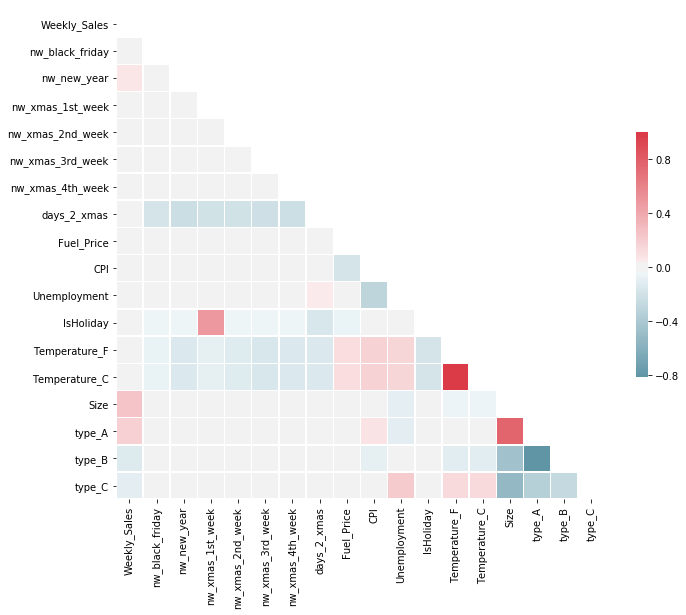

In [38]:
corr = merged_all_df.iloc[:,3:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Begründung warum keine Korrelation zwischen nw_new_year und IsHoliday, aber schon zwischen nw_xmas_1st_week und IsHoliday

Begründung drop temp Fahrenheit wegen 100% Kokain

In [39]:
if 'Temperature_F' in merged_all_df.columns:
    merged_all_df.drop(columns='Temperature_F',inplace=True)

__Fertig Vorbereitung:__
Wir haben eine Datensatz mit x Messpunkten und y Zeilen

In [40]:
display(merged_all_df.shape)

(294132, 20)

### Normalize Data

Die Normalisierung wird innerhalb des Generators erfolgen.

### Rolling / Windowing

In [41]:
#merged_all_df['smooth_weekly_sales'] = merged_all_df['Weekly_Sales'].rolling(window=5,center=False).mean()
#display(merged_all_df[['Weekly_Sales','smooth_weekly_sales']])

### Dictionary bauen: Neural Network Approach

Danke an [Kevin Palmer](https://github.com/kevinpalm/walmart_sales_forecast/blob/master/final_model.py).

In [42]:
multi_dict = {}

Alle Store-Dept-IDs generieren

In [43]:
merged_all_df['Store_Dept'] = merged_all_df.Store.astype(str) + '_' + merged_all_df.Dept.astype(str)
print(merged_all_df.Store_Dept.nunique())

3302


Die Schlüssel für die erste Ebene anlegen  
__HIER IST DIE WEICHE FÜR STORE_DEPT-Kombos__

Damit die Prüfungen im weitern Verlauf alle funktionieren, __MUSS__ die Store-Department-Kombination ```1_1``` __IMMER__ enthalten sein!

In [44]:
store_dept_subgroup = ['1_1', '2_1']

for store_dept in store_dept_subgroup:
    multi_dict[store_dept] = {}
print(len(multi_dict))

2


### Split Datasets

#### Validation je Store und Depatment

__Abspalten Validation:__

<img src="./media/calendar.jpg" width="500"/>

Dir rote Woche wegschneiden

In [45]:
date_cutoff = date(2011,12,30)
merged_all_df.drop(merged_all_df[(merged_all_df.Date >= date_cutoff)].index, inplace=True)
print(merged_all_df.Date.max())

2011-12-23 00:00:00


/Users/DE2303318/miniconda3/envs/condatascience/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


__Erklärung:__  
Sehr hässlich, allerdings nachträglich notwendig geworden für Data Preparation für Bäume.

In [46]:
merged_all_for_tree_df = merged_all_df.copy()

Die einzelnen val_dfs für store-dept erzeugen und ins dict speichern

In [47]:
date_start_windowing = date(2011,11,25)
date_validation_week = date(2011,12,23)

if date_validation_week in merged_all_df.Date.dt.date.values:
    for store_dept in multi_dict.keys():
        multi_dict[store_dept]['val_data_df'] = merged_all_df[(merged_all_df.Date >= date_start_windowing)&(merged_all_df.Store_Dept == store_dept)].reset_index(drop=True)

/Users/DE2303318/miniconda3/envs/condatascience/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [48]:
multi_dict['1_1'].keys()

dict_keys(['val_data_df'])

In [49]:
multi_dict['1_1']['val_data_df'][['Store', 'Dept', 'Date', 'Weekly_Sales']]

,Store,Dept,Date,Weekly_Sales
0,1,1,2011-11-25,20911.25
1,1,1,2011-12-02,25293.49
2,1,1,2011-12-09,33305.92
3,1,1,2011-12-16,45773.03
4,1,1,2011-12-23,46788.75


Die Validation Week aus dem Datensatz nehmen

In [50]:
merged_all_df.drop(merged_all_df[(merged_all_df.Date == date_validation_week)].index, inplace=True)
print(merged_all_df.Date.max())

2011-12-16 00:00:00


/Users/DE2303318/miniconda3/envs/condatascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


Die Validierungs-Woche ist also nicht mehr enthalten:

In [51]:
merged_all_df[(merged_all_df.Date >= date_start_windowing)&(merged_all_df.Store_Dept == '1_1')][['Store', 'Dept', 'Date', 'Weekly_Sales']].reset_index(drop=True)

/Users/DE2303318/miniconda3/envs/condatascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


,Store,Dept,Date,Weekly_Sales
0,1,1,2011-11-25,20911.25
1,1,1,2011-12-02,25293.49
2,1,1,2011-12-09,33305.92
3,1,1,2011-12-16,45773.03


#### Train-Test-Daten je Store und Department

Alle Dataframes nach Store-Dept abspeichern

In [52]:
def restructure_df_for_target_variable(df):
    return df[['Date',
       'nw_black_friday', 'nw_new_year', 'nw_xmas_1st_week', 'nw_xmas_2nd_week',
       'nw_xmas_3rd_week', 'nw_xmas_4th_week', 'days_2_xmas', 'Fuel_Price',
       'CPI', 'Unemployment', 'IsHoliday', 'Temperature_C', 'Size', 'type_A',
       'type_B', 'type_C', 'Weekly_Sales']].reset_index(drop=True)

In [53]:
for store_dept in multi_dict.keys():
    multi_dict[store_dept]['train_test_df'] = restructure_df_for_target_variable(merged_all_df[(merged_all_df.Store_Dept == store_dept)])

In [54]:
multi_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df'])

In [55]:
multi_dict['1_1']['train_test_df'].head()

,Date,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,nw_xmas_4th_week,days_2_xmas,Fuel_Price,CPI,Unemployment,IsHoliday,Temperature_C,Size,type_A,type_B,type_C,Weekly_Sales
0,2010-02-05,0,0,0,0,0,0,323,2.572,211.096358,8.106,0,5.73,151315,1,0,0,24924.50
1,2010-02-12,0,0,0,0,0,0,316,2.548,211.242170,8.106,1,3.62,151315,1,0,0,46039.49
2,2010-02-19,0,0,0,0,0,0,309,2.514,211.289143,8.106,0,4.41,151315,1,0,0,41595.55
3,2010-02-26,0,0,0,0,0,0,302,2.561,211.319643,8.106,0,8.13,151315,1,0,0,19403.54
4,2010-03-05,0,0,0,0,0,0,295,2.625,211.350143,8.106,0,8.06,151315,1,0,0,21827.90


#### Train-Test-Split

In [56]:
def scale_data(data_np, scaler=None):
    if not scaler:
        scaler = StandardScaler().fit(data_np)
    return scaler.transform(data_np), scaler

In [57]:
def get_X_y_scalers(data_df):
    data_np = data_df.drop(columns='Date').values
    X_scaler = StandardScaler().fit(data_np[:,:-1])
    y_scaler = StandardScaler().fit(data_np[:,-1].reshape(-1, 1))
    return X_scaler, y_scaler

In [58]:
def X_y_split(data_df, lookback, delay, X_y_scaler=None):
    data_np = data_df.drop(columns='Date').values
    data_rows = np.arange(lookback, data_np.shape[0] - delay)
    
    scaled_data_np, X_y_scaler = scale_data(data_np, X_y_scaler)

    X_np = np.zeros((len(data_rows), lookback, scaled_data_np.shape[1]-1))
    y_np = np.zeros((len(data_rows),))
    
    for i, row in enumerate(data_rows):
        indices = range(row - lookback, row)
        X_np[i] = scaled_data_np[indices,:-1]
        y_np[i] = scaled_data_np[row + delay][-1]
    
    return X_np, y_np, X_y_scaler

In [59]:
def split_data(data, lookback, delay, cutoff_date):
    train_samples, train_targets, X_y_scaler = X_y_split(data[data.Date <= cutoff_date], lookback, delay)
    test_samples, test_targets, X_y_scaler = X_y_split(data[data.Date > cutoff_date], lookback, delay, X_y_scaler)
    return train_samples, train_targets, test_samples, test_targets, X_y_scaler

Definiere Split-Attribute

In [60]:
lookback = 4
delay = 0
cutoff_date = '2011-05-01'

Hole X- und y-scaler

In [61]:
for store_dept in multi_dict.keys():
    df = multi_dict[store_dept]['train_test_df']
    X_scaler, y_scaler = get_X_y_scalers(df[df.Date <= cutoff_date])
    multi_dict[store_dept]['X_scaler'] = X_scaler
    multi_dict[store_dept]['y_scaler'] = y_scaler

In [62]:
multi_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_scaler', 'y_scaler'])

Hole Trainings- und Test-daten

In [63]:
for store_dept in multi_dict.keys():
    X_train, y_train, X_test, y_test, X_y_scaler = split_data(multi_dict[store_dept]['train_test_df'], lookback, delay, cutoff_date)
    multi_dict[store_dept]['X_train'] = X_train
    multi_dict[store_dept]['y_train'] = y_train
    multi_dict[store_dept]['X_test'] = X_test
    multi_dict[store_dept]['y_test'] = y_test
    multi_dict[store_dept]['X_y_scaler'] = X_y_scaler

In [64]:
multi_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_scaler', 'y_scaler', 'X_train', 'y_train', 'X_test', 'y_test', 'X_y_scaler'])

__Zu prüfen:__
Wurden wirklich die korrekten Werte für die Examples verarbeitet? Dazu vergleiche ich den ersten Messpunkt:

In [65]:
multi_dict['1_1']['X_train'][0][0]

array([-0.125     , -0.125     , -0.125     , -0.125     , -0.125     ,
       -0.125     ,  1.23097872, -0.88158673, -0.63212245,  2.46911839,
       -0.28867513, -1.50046034,  0.        ,  0.        ,  0.        ,
        0.        ])

In [66]:
multi_dict['1_1']['X_scaler'].inverse_transform(multi_dict['1_1']['X_train'][0][0])

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.23000000e+02, 2.57200000e+00,
       2.11096358e+02, 8.10600000e+00, 0.00000000e+00, 5.73000000e+00,
       1.51315000e+05, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [67]:
multi_dict['1_1']['train_test_df'].iloc[0]

Date                2010-02-05 00:00:00
nw_black_friday                       0
nw_new_year                           0
nw_xmas_1st_week                      0
nw_xmas_2nd_week                      0
nw_xmas_3rd_week                      0
nw_xmas_4th_week                      0
days_2_xmas                         323
Fuel_Price                        2.572
CPI                             211.096
Unemployment                      8.106
IsHoliday                             0
Temperature_C                      5.73
Size                             151315
type_A                                1
type_B                                0
type_C                                0
Weekly_Sales                    24924.5
Name: 0, dtype: object

> Das sieht soweit ganz gut aus!

__Zu prüfen:__
Wurden wirklich die korrekten Werte für die Zielvariable verarbeitet?

In [68]:
multi_dict['1_1']['y_train'][0]

-0.21441960395189766

In [69]:
multi_dict['1_1']['y_scaler'].inverse_transform(multi_dict['1_1']['y_train'][0].reshape(-1, 1))

array([[21827.9]])

In [70]:
multi_dict['1_1']['train_test_df'].Weekly_Sales.iloc[lookback + delay]

21827.9

#### Validation to np

Jetzt brauchen wir die Val-Data nicht mehr komplett, sondern auch al np-Array:

In [71]:
for store_dept in multi_dict.keys():
    multi_dict[store_dept]['val_data_df'] = restructure_df_for_target_variable(multi_dict[store_dept]['val_data_df'])

In [72]:
for store_dept in multi_dict.keys():
    X_np, y_np, foo = X_y_split(multi_dict[store_dept]['val_data_df'], lookback, delay, multi_dict[store_dept]['X_y_scaler'])
    multi_dict[store_dept]['X_val'] = X_np
    multi_dict[store_dept]['y_val'] = y_np
multi_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_scaler', 'y_scaler', 'X_train', 'y_train', 'X_test', 'y_test', 'X_y_scaler', 'X_val', 'y_val'])

#### Set prediction goal

In [73]:
for store_dept in multi_dict.keys():
    multi_dict[store_dept]['prediction_goal'] = multi_dict[store_dept]['val_data_df'].iloc[-1].Weekly_Sales

In [74]:
multi_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_scaler', 'y_scaler', 'X_train', 'y_train', 'X_test', 'y_test', 'X_y_scaler', 'X_val', 'y_val', 'prediction_goal'])

In [75]:
multi_dict['1_1']['prediction_goal']

46788.75

## MODELING: Neural Network Approach

### Baseline

Der Einfachheit halber nur für Store-Department-Kombination ```1_1```.

In [76]:
def get_baseline_prediction_values(df):
    prognose_sales = df.iloc[-2].Weekly_Sales
    actual_sales = df.iloc[-1].Weekly_Sales
    return [prognose_sales, actual_sales, actual_sales - prognose_sales]

In [77]:
baseline_prediction_values = get_baseline_prediction_values(multi_dict['1_1']['val_data_df'])
print("Baseline Prognose:\t{}".format(baseline_prediction_values[0]))
print("Tatsächliche Sales:\t{}".format(multi_dict['1_1']['prediction_goal']))
print("Absoluter Fehler:\t{}".format(baseline_prediction_values[2]))

Baseline Prognose:	45773.03
Tatsächliche Sales:	46788.75
Absoluter Fehler:	1015.7200000000012


### 2-layer Multi-Layer-Perceptron

In [78]:
for store_dept in multi_dict.keys():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(lookback, multi_dict[store_dept]['X_train'].shape[-1])))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    print(model.summary())
    model.compile(optimizer=RMSprop(), loss='mae')
    history = model.fit(multi_dict[store_dept]['X_train'],
                        multi_dict[store_dept]['y_train'],
                        epochs=20,
                        validation_data=(multi_dict[store_dept]['X_test'], multi_dict[store_dept]['y_test']))
    multi_dict[store_dept]['2MLP'] = {}
    multi_dict[store_dept]['2MLP']['model'] = model
    multi_dict[store_dept]['2MLP']['history'] = history
    multi_dict[store_dept]['2MLP']['score'] = model.evaluate(multi_dict[store_dept]['X_val'], multi_dict[store_dept]['y_val'])
    multi_dict[store_dept]['2MLP']['prediction'] = multi_dict[store_dept]['y_scaler'].inverse_transform(model.predict(multi_dict[store_dept]['X_val']).reshape(-1, 1))[0][0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
_________________________________________________________________
None
Train on 61 samples, validate on 29 samples
Epoch 1/20
61/61 [==============================] - 0s 2ms/step - loss: 0.7236 - val_loss: 0.8740
Epoch 2/20
61/61 [==============================] - 0s 131us/step - loss: 0.6159 - val_loss: 0.9139
Epoch 3/20
61/61 [==============================] - 0s 131us/step - loss: 0.5670 - val_loss: 0.9493
Epoch 4/20
61/61 [==============================] - 0s 13

### Simple GRU Model

In [79]:
for store_dept in multi_dict.keys():
    model = Sequential()
    model.add(layers.GRU(32, input_shape=(None, multi_dict[store_dept]['X_train'].shape[-1])))
    model.add(layers.Dense(1))
    print(model.summary())
    model.compile(optimizer=RMSprop(), loss='mae')
    history = model.fit(multi_dict[store_dept]['X_train'],
                        multi_dict[store_dept]['y_train'],
                        epochs=20,
                        validation_data=(multi_dict[store_dept]['X_test'], multi_dict[store_dept]['y_test']))
    multi_dict[store_dept]['GRU'] = {}
    multi_dict[store_dept]['GRU']['model'] = model
    multi_dict[store_dept]['GRU']['history'] = history
    multi_dict[store_dept]['GRU']['score'] = model.evaluate(multi_dict[store_dept]['X_val'], multi_dict[store_dept]['y_val'])
    multi_dict[store_dept]['GRU']['prediction'] = multi_dict[store_dept]['y_scaler'].inverse_transform(model.predict(multi_dict[store_dept]['X_val']).reshape(-1, 1))[0][0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4704      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________
None
Train on 61 samples, validate on 29 samples
Epoch 1/20
61/61 [==============================] - 0s 8ms/step - loss: 0.7322 - val_loss: 0.8926
Epoch 2/20
61/61 [==============================] - 0s 271us/step - loss: 0.6703 - val_loss: 0.9310
Epoch 3/20
61/61 [==============================] - 0s 245us/step - loss: 0.6259 - val_loss: 0.9673
Epoch 4/20
61/61 [==============================] - 0s 235us/step - loss: 0.5925 - val_loss: 0.9975
Epoch 5/20
61/61 [==============================] - 0s 254us/step - loss: 0.5599 - val_lo

### Evaluation der Modelle

In [80]:
def plot_model_results(model_results):  
    loss = model_results['history'].history['loss']
    val_loss = model_results['history'].history['val_loss']
    min_val_loss=np.min(val_loss)
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs[1:], loss[1:], 'bo', label='Training loss')
    plt.plot(epochs[1:], val_loss[1:], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    print('Minimun loss on validation data: ', min_val_loss)
    print('Model score:{}'.format(model_results['score']))
    print('Prediction result:{}'.format(model_results['prediction']))

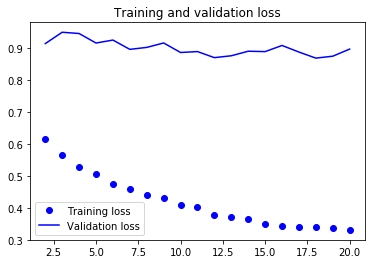

Minimun loss on validation data:  0.8685272336006165
Model score:0.012719869613647461
Prediction result:46651.5546875


In [81]:
plot_model_results(multi_dict['1_1']['2MLP'])

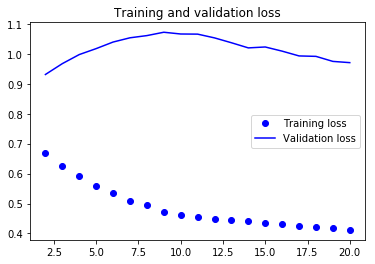

Minimun loss on validation data:  0.8925782442092896
Model score:0.5480154752731323
Prediction result:40877.9609375


In [82]:
plot_model_results(multi_dict['1_1']['GRU'])

__TODO:__ 
+ alles scheiße
+ Ergebnisse wegen zu wenig Daten nicht reproduzierbar
    + wenn sie gut sind, dann nur durch Zufall
+ rückschritt zu data preparation für baum (2-D ohne Windowing)

## DATA PREPARATION: Tree Approach

### Dictionary bauen

In [83]:
tree_dict = {}

Die Schlüssel für die erste Ebene anlegen  
__HIER IST DIE WEICHE FÜR STORE_DEPT-Kombos__

Damit die Prüfungen im weitern Verlauf alle funktionieren, __MUSS__ die Store-Department-Kombination ```1_1``` __IMMER__ enthalten sein!

In [84]:
store_dept_subgroup = ['1_1']

for store_dept in store_dept_subgroup:
    tree_dict[store_dept] = {}
print(len(tree_dict))

1


### Split Datasets

#### Validation je Store und Department

<img src="./media/calendar_tree.jpg" width="500"/>

In [85]:
merged_all_for_tree_df.Date.max()

Timestamp('2011-12-23 00:00:00')

In [86]:
for store_dept in tree_dict.keys():
    tmp = merged_all_for_tree_df[merged_all_for_tree_df.Store_Dept == store_dept].iloc[-2:]
    tmp.Weekly_Sales = tmp.Weekly_Sales.shift(periods=-1)
    tree_dict[store_dept]['val_data_df'] = tmp.iloc[0]
    
tree_dict['1_1']['val_data_df']

Store                                 1
Dept                                  1
Date                2011-12-16 00:00:00
Weekly_Sales                    46788.8
nw_black_friday                       0
nw_new_year                           0
nw_xmas_1st_week                      0
nw_xmas_2nd_week                      0
nw_xmas_3rd_week                      0
nw_xmas_4th_week                      1
days_2_xmas                           9
Fuel_Price                        3.159
CPI                             219.179
Unemployment                      7.866
IsHoliday                             0
Temperature_C                     10.91
Size                             151315
type_A                                1
type_B                                0
type_C                                0
Store_Dept                          1_1
Name: 6950, dtype: object

#### Train-Test-Daten je Store und Department

In [87]:
for store_dept in tree_dict.keys():
    tmp = restructure_df_for_target_variable(merged_all_for_tree_df[(merged_all_for_tree_df.Store_Dept == store_dept)])
    tmp.Weekly_Sales = tmp.Weekly_Sales.shift(periods=-1)
    tree_dict[store_dept]['train_test_df'] = tmp.iloc[:-2]

In [88]:
tree_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df'])

In [89]:
tree_dict['1_1']['train_test_df'].tail()

,Date,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,nw_xmas_4th_week,days_2_xmas,Fuel_Price,CPI,Unemployment,IsHoliday,Temperature_C,Size,type_A,type_B,type_C,Weekly_Sales
92,2011-11-11,0,0,0,0,0,0,44,3.297,217.998085,7.866,0,15.06,151315,1,0,0,19050.66
93,2011-11-18,1,0,0,0,0,0,37,3.308,218.220509,7.866,0,16.81,151315,1,0,0,20911.25
94,2011-11-25,0,0,1,0,0,0,30,3.236,218.467621,7.866,1,15.63,151315,1,0,0,25293.49
95,2011-12-02,0,0,0,1,0,0,23,3.172,218.714733,7.866,0,9.39,151315,1,0,0,33305.92
96,2011-12-09,0,0,0,0,1,0,16,3.158,218.961846,7.866,0,6.63,151315,1,0,0,45773.03


#### Train-Test-Split

In [90]:
for store_dept in tree_dict.keys():
    X = tree_dict[store_dept]['train_test_df'].iloc[:,:-1]
    y = tree_dict[store_dept]['train_test_df'].iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1,shuffle=False)
    X_scaler, y_scaler = get_X_y_scalers(tree_dict[store_dept]['train_test_df'])
    X_train_np, foo = scale_data(X_train.drop(columns='Date').values, X_scaler)
    y_train_np, foo = scale_data(y_train.values.reshape(-1, 1), y_scaler)
    X_test_np, foo = scale_data(X_test.drop(columns='Date').values, X_scaler)
    y_test_np, foo = scale_data(y_test.values.reshape(-1, 1), y_scaler)
    foo, X_y_scaler = scale_data(tree_dict[store_dept]['train_test_df'].drop(columns='Date').values)
    tree_dict[store_dept]['X_train'] = X_train_np
    tree_dict[store_dept]['y_train'] = y_train_np
    tree_dict[store_dept]['X_test'] = X_test_np
    tree_dict[store_dept]['X_test_with_dates'] = X_test
    tree_dict[store_dept]['y_test'] = y_test_np
    tree_dict[store_dept]['X_scaler'] = X_scaler
    tree_dict[store_dept]['y_scaler'] = y_scaler
    tree_dict[store_dept]['X_y_scaler'] = X_y_scaler

In [91]:
tree_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_train', 'y_train', 'X_test', 'X_test_with_dates', 'y_test', 'X_scaler', 'y_scaler', 'X_y_scaler'])

#### Validation to np

In [92]:
for store_dept in tree_dict.keys():
    tmp = restructure_df_for_target_variable(pd.DataFrame(tree_dict[store_dept]['val_data_df']).transpose()).drop(columns='Date')
    tmp_np, foo = scale_data(tmp.values, X_y_scaler)
    tree_dict[store_dept]['X_val'] = tmp_np[:,:-1]
    tree_dict[store_dept]['y_val'] = tmp_np[:,-1]

/Users/DE2303318/miniconda3/envs/condatascience/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [93]:
tree_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_train', 'y_train', 'X_test', 'X_test_with_dates', 'y_test', 'X_scaler', 'y_scaler', 'X_y_scaler', 'X_val', 'y_val'])

#### Set prediction goal

In [94]:
for store_dept in tree_dict.keys():
    tree_dict[store_dept]['prediction_goal'] = tree_dict[store_dept]['val_data_df'].Weekly_Sales

In [95]:
tree_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_train', 'y_train', 'X_test', 'X_test_with_dates', 'y_test', 'X_scaler', 'y_scaler', 'X_y_scaler', 'X_val', 'y_val', 'prediction_goal'])

In [96]:
tree_dict['1_1']['prediction_goal']

46788.75

In [97]:
tree_dict['1_1']['y_scaler'].inverse_transform(tree_dict['1_1']['y_val'])

array([46788.75])

## MODELING: Tree Approach

### Gradient Boosting Regression

In [98]:
## .ravel() -> transforming column-vector in 1D-Array
gb_regressor = GradientBoostingRegressor(n_estimators=400, random_state=1)
gb_regressor.fit(tree_dict['1_1']['X_train'], tree_dict['1_1']['y_train'].ravel())
print(gb_regressor)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)


In [99]:
tree_dict['1_1']['y_pred'] = gb_regressor.predict(tree_dict['1_1']['X_test'])

### Evaluation der Modelle

#### MAE

In [100]:
gb_mae = mean_absolute_error(tree_dict['1_1']['y_test'],tree_dict['1_1']['y_pred'])
tree_dict['1_1']['y_scaler'].inverse_transform(np.array([gb_mae]))

array([30355.3007292])

#### Feature Importance

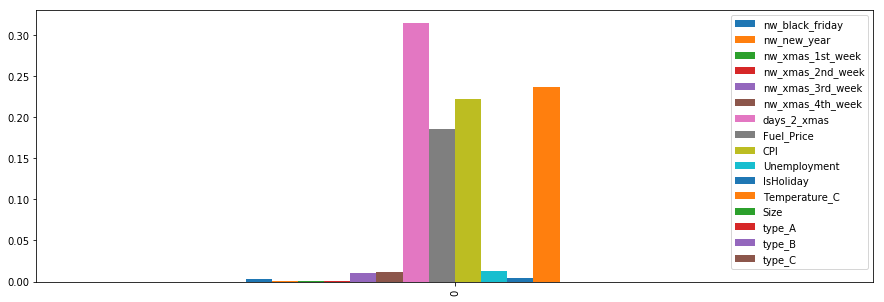

In [101]:
df_feat_imp = pd.DataFrame(gb_regressor.feature_importances_).transpose()
df_feat_imp.columns = tree_dict['1_1']['train_test_df'].columns[1:-1]
df_feat_imp.plot(kind='bar',figsize=(15,5))
plt.show()

#### Gegenüberstellung der Vorhersage und der Testdaten

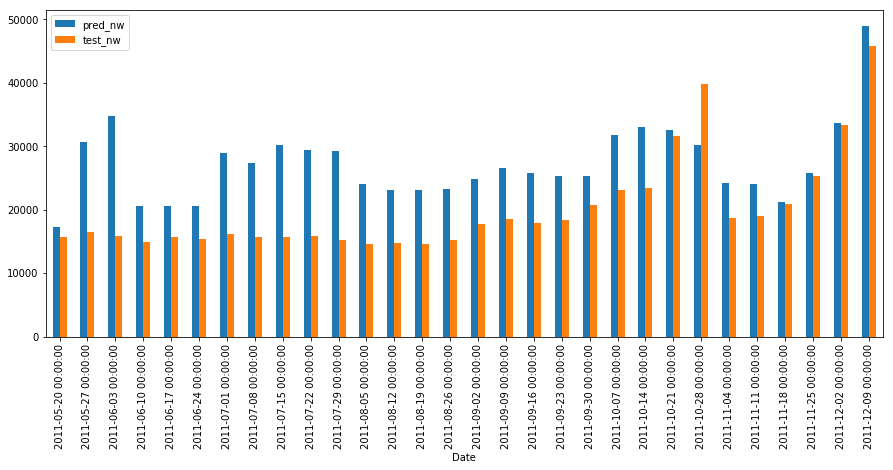

In [102]:
test_dates = tree_dict['1_1']['X_test_with_dates']['Date'].values
plot_y_pred = tree_dict['1_1']['y_scaler'].inverse_transform(tree_dict['1_1']['y_pred'])
plot_y_test = tree_dict['1_1']['y_scaler'].inverse_transform(tree_dict['1_1']['y_test'].ravel())

plot_df = pd.DataFrame([test_dates,plot_y_pred,plot_y_test]).transpose().rename(columns={0:'Date',1:'pred_nw',2:'test_nw'})
plot_df.Date = pd.to_datetime(plot_df.Date)
plot_df.sort_values('Date').plot(x='Date',kind='bar',figsize=(15,6))
plt.show()

**Achtung!:** Die Sales Werte bezeichnen den Sales für die kommende Woche, ausgehend von dem angezeigten Datum!

Da die Temperatur unser wichtigstes Attribut ist, wäre es interessant zu erfahren, ob bei den Stores, welche in keiner extremen Klimazon liegen, die prediction besser ist.

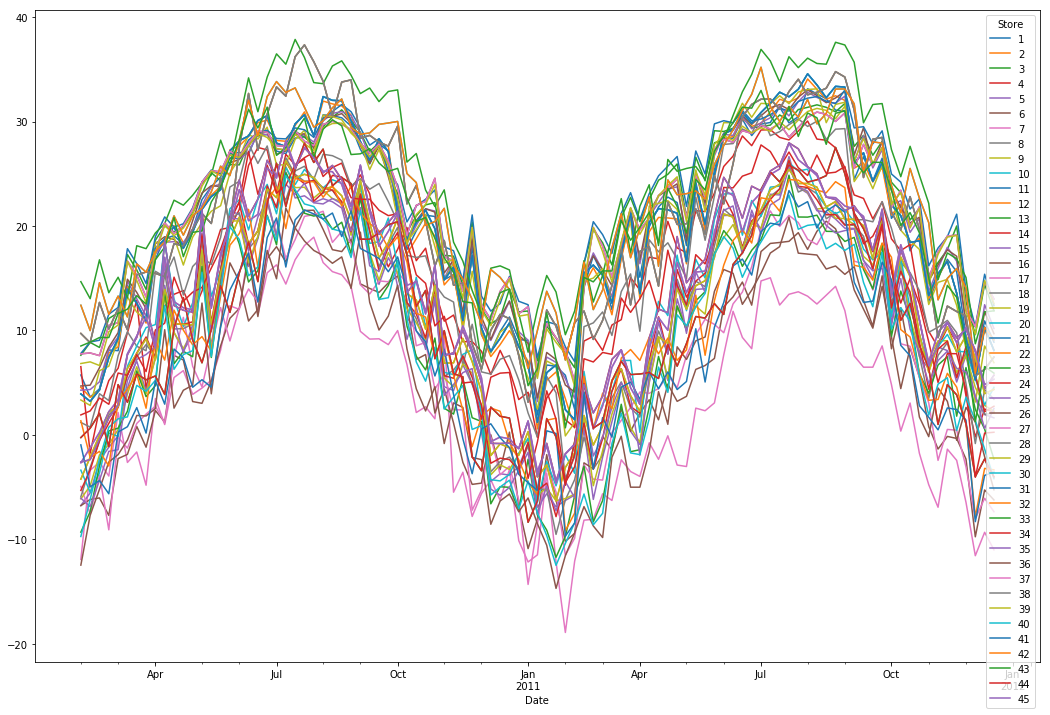

In [169]:
plot_temp_c = merged_all_for_tree_df.copy()
plot_temp_c = plot_temp_c.groupby(['Date','Store'],as_index=False).median()
plot_temp_c = plot_temp_c.set_index(keys=['Store', 'Date'])['Temperature_C'].unstack(level='Store')
plot_temp_c.plot(figsize=(18,12))
plt.show()

#### Prediction with Validation Data

In [114]:
tree_dict['1_1']['y_val_pred'] = gb_regressor.predict(tree_dict['1_1']['X_val'])

In [116]:
gb_val_pred = tree_dict['1_1']['y_scaler'].inverse_transform(tree_dict['1_1']['y_val_pred'])
print(gb_val_pred)

[59367.8901814]


## EVALUATION: Gegenüberstellung NN und Tree

In [145]:
mlp_pred = multi_dict['1_1']['2MLP']['prediction']
gru_pred = multi_dict['1_1']['GRU']['prediction']
y_val = tree_dict['1_1']['y_scaler'].inverse_transform(tree_dict['1_1']['y_val'])
mpl_mae = multi_dict['1_1']['y_scaler'].inverse_transform(np.array([np.min(multi_dict['1_1']['2MLP']['history'].history['val_loss'])]))
gru_mae = multi_dict['1_1']['y_scaler'].inverse_transform(np.array([np.min(multi_dict['1_1']['GRU']['history'].history['val_loss'])]))
gb_tree_mae = tree_dict['1_1']['y_scaler'].inverse_transform(np.array([gb_mae]))

In [167]:
eval_df = pd.DataFrame([[mlp_pred,gru_pred,gb_val_pred[0],y_val[0]]])
eval_df = eval_df.append([[mpl_mae[0],gru_mae[0],gb_tree_mae[0]]]).reset_index(drop=True)
eval_df = eval_df.rename(index={0:'prediction',1:'MAE'},columns={0:'mlp_pred',1:'gru_pred',2:'gb_tree_pred',3:'validation'})

/Users/DE2303318/miniconda3/envs/condatascience/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


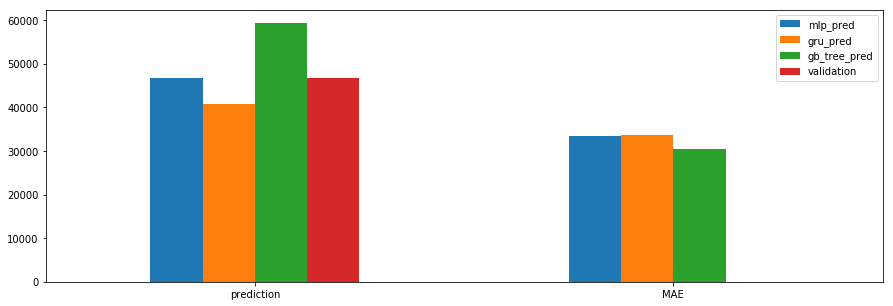

In [168]:
eval_df.plot(kind='bar',rot=0, figsize=(15,5))
plt.show()

## DEPLOYMENT / Lessons Learned

__TODO:__ 
+ brauchen wir den schritt überhaupt?
+ evtl stattdessen einfach: __LESSONS LEARNED__ und __IDEEN FÜR DIE ZUKUNFT__ machen oder so

### Deanonymisierung

https://en.wikipedia.org/wiki/User:Michael_J/County_table

Neben Wetterdaten auch die A-lo-Quote nutzen?

Hilfe evtl bei Kreditkarten-Analyse

__TODO:__ 
+ Hier wollen wir sowohl mit Baum, als auch mit Netz arbeiten. 
+ Wir sollten mit der Grafik von scikit-learn begründen, warum wir welche Technik nutzen [hatten wir schonmal](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
Zusätzliche Informationen: https://data-science-blog.com/blog/2016/04/26/machine-learning-mit-python-tutorial-minimalbeispiel/

Fragen zur Begründung:
+ wieviele Examples haben wir?


__TODO:__ Ich würde hier vielleicht vergleichen, inwiefern ein GradientBoostingRegressor weiterführen kann. => Addtional Feature

__TODO:__ Unterschiede herausarbeiten und darstellen => Welche Kennzahlen sind hier am ausschlaggebenden?

In [ ]:
#Neuronales Netz